# Proyek Analisis Data: Bike Sharing
- **Nama:** M Dzafadhlan F Muzakki
- **Email:** fadhlandza11@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan bulan ke bulan?
- apakah hari kerja dan hari libur berpengaruh dalam penyewaan sepeda?
- apakah musim berpengaruh dalam penyawaan sepeda?




## Import Semua Packages/Library yang Digunakan

In [208]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [209]:
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1


In [210]:
day_df = pd.read_csv("/root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [211]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [212]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [213]:
day_df.duplicated().sum()

0

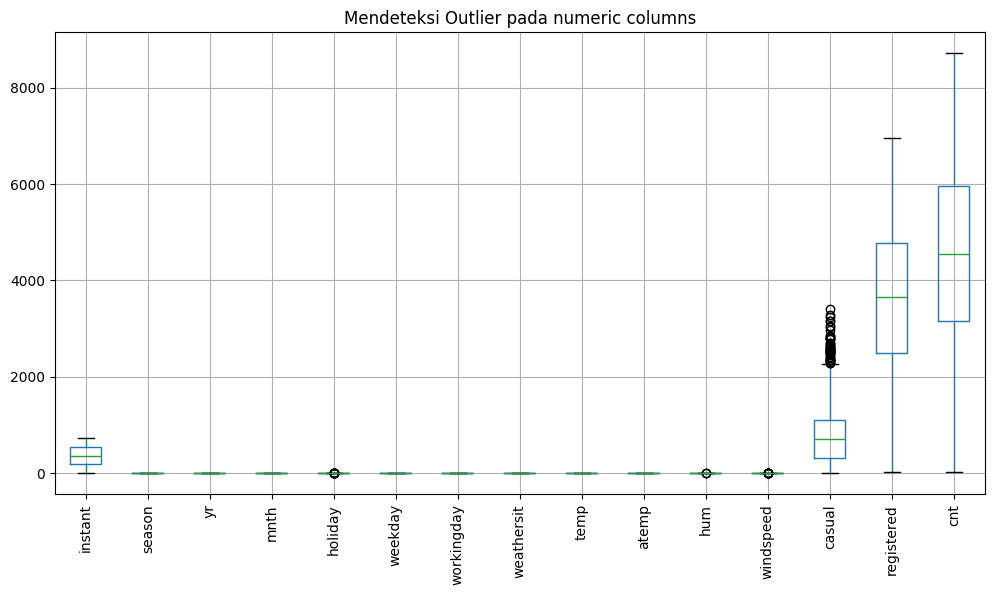

In [214]:
numeric_col = day_df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 6))
day_df[numeric_col].boxplot(rot= 90)
plt.title("Mendeteksi Outlier pada numeric columns")
plt.show()

In [225]:
day_df.describe()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


*Insight*:


---
pada tahap ini kita menumukan beberapa insight :

*   dataset ini memiliki dulikat data 0
*   terdapat kesalahan *data type* dteday yang seharusnya ber-tipe dateTime
* tidak ada nilai null disetiap datanya
* ada beberapa outlier, ialah :    
 * kolom casual memiliki outlier yang mungkin banyak penyewa sepeda tanpa registrasi
 * kolom cnt memiliki outlier yang artinya ada hari-hari dengan lonjakan ekstrim dalam peminjaman





### Cleaning Data

**TODO** :


---
*   Pada tahap ini kita akan mengganti tipe data dari kolom dteday menjadi dateTime
* kemudian, kita juga akan menganti angka pada kolom season dan wethersit dengan nama kategori





In [215]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [216]:
season_map = {
    1:"springer",
    2:"summer",
    3:"fall",
    4:"winter"}
day_df['season'] = day_df['season'].map(season_map)

In [217]:
weather_map = {
    1: 'Clear',
    2: 'Misty',
    3: 'Light_rainsnow',
    4: 'Heavy_rainsnow'
}
day_df['weathersit'] = day_df['weathersit'].map(weather_map)

In [218]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"


day_df["humidity_category"] = day_df["hum"].apply(classify_humidity)

In [219]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,humidity_category
0,1,2011-01-01,springer,0,1,0,6,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985,Terlalu kering
1,2,2011-01-02,springer,0,1,0,0,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801,Terlalu kering
2,3,2011-01-03,springer,0,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Terlalu kering
3,4,2011-01-04,springer,0,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Terlalu kering
4,5,2011-01-05,springer,0,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Terlalu kering
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,1,12,0,4,1,Misty,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Terlalu kering
727,728,2012-12-28,springer,1,12,0,5,1,Misty,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Terlalu kering
728,729,2012-12-29,springer,1,12,0,6,0,Misty,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Terlalu kering
729,730,2012-12-30,springer,1,12,0,0,0,Clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Terlalu kering


## Exploratory Data Analysis (EDA)

### Explore ...

In [220]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,humidity_category
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,fall,NaN,NaN,NaN,NaN,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Terlalu kering
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


**Insight:**
1. Data Umum
* Dataset berisi 731 baris (jumlah hari dalam 2 tahun).
* Terdapat 15 fitur yang mencakup informasi tanggal, musim, cuaca, suhu, kelembaban, kecepatan angin, dan jumlah pengguna sepeda.
* Data mencakup 2 tahun (2011 - 2012).
2. Kolom Kategorikal
* Season: Data terbagi dalam 4 musim, dengan musim gugur (fall) menjadi musim terbanyak (188 hari).
* Weathersit (Kondisi Cuaca): Terdapat 3 kategori cuaca (kategori ke-4 tidak ada di dataset).
* Cuaca cerah / berawan mendominasi (463 hari).
* Cuaca ekstrem (hujan deras + badai) sangat jarang terjadi.
 * Workingday: ~68% hari adalah hari kerja, sisanya adalah akhir pekan atau hari libur.
 * Holiday: Hari libur hanya ~2.8% dari total data.
3. Statistik Data Numerik
* Suhu (temp): Rata-rata 0.49 (nilai dinormalisasi, jika dikonversi sekitar 15°C - 20°C).
* Kelembaban (hum): Rata-rata 0.63 (sekitar 63%), dengan variasi cukup besar.
* Kecepatan angin (windspeed): Rata-rata 0.19 (sekitar 12-13 km/h), jarang ada angin kencang.
4. Jumlah Pengguna
* Total pengguna sepeda (cnt):
 * Rata-rata: 4.504 pengguna per hari.
 * Minimum: 22 pengguna (hari terendah).
 * Maksimum: 8.714 pengguna (hari tertinggi).
* Tipe pengguna:
 * Casual users (pengguna tidak terdaftar): Rata-rata 848 pengguna/hari.
 * Registered users (pengguna terdaftar): Rata-rata 3.656 pengguna/hari.
 * Mayoritas pengguna adalah pengguna terdaftar (hampir 4x lipat dari casual).


## Visualization & Explanatory Analysis

### Pertanyaan 1:

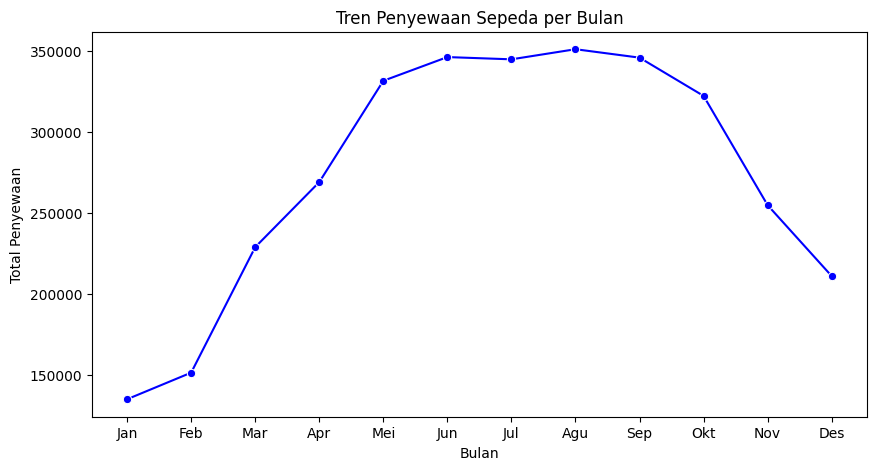

In [221]:
monthly_trend = day_df.groupby("mnth")["cnt"].sum()

# Visualisasi
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker="o", linestyle="-", color="b")
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan")
plt.title("Tren Penyewaan Sepeda per Bulan")
plt.xticks(range(1,13), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.show()

*insight*


---
1. Penyewaan sepeda meningkat dari awal tahun ke pertengahan tahun
 * Januari dan Februari memiliki jumlah penyewaan sepeda terendah (~130.000 - 150.000).
 * Tren mulai meningkat drastis dari Maret hingga Mei.

2. Puncak penyewaan terjadi pada Mei - September
 * Mei hingga September menunjukkan jumlah penyewaan tertinggi, berkisar antara 320.000 - 350.000.
 * Hal ini bisa disebabkan oleh cuaca yang lebih baik dan lebih banyak aktivitas luar ruangan.

3. Penyewaan mulai menurun setelah September
 * Dari Oktober, jumlah penyewaan menurun secara bertahap.
 * Penurunan drastis terjadi pada November dan Desember, kemungkinan karena cuaca yang lebih dingin atau musim hujan/salju.


### Pertanyaan 2:

<ipython-input-222-c3612fc0b3eb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workingday_trend.index, y=workingday_trend.values, palette="pastel")


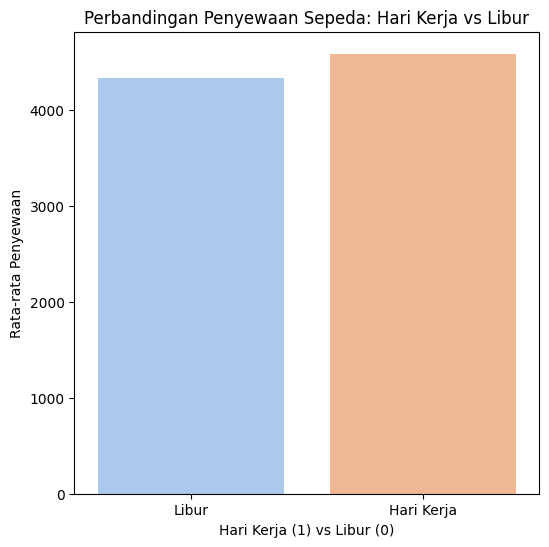

In [222]:
workingday_trend = day_df.groupby("workingday")["cnt"].mean()

# Visualisasi
plt.figure(figsize=(6,6))
sns.barplot(x=workingday_trend.index, y=workingday_trend.values, palette="pastel")
plt.xlabel("Hari Kerja (1) vs Libur (0)")
plt.ylabel("Rata-rata Penyewaan")
plt.title("Perbandingan Penyewaan Sepeda: Hari Kerja vs Libur")
plt.xticks([0,1], ["Libur", "Hari Kerja"])
plt.show()

**Insight:**


---
1. Penyewaan lebih tinggi pada hari kerja dibandingkan hari libur
 * Rata-rata penyewaan sepeda lebih tinggi di hari kerja dibandingkan hari libur.
 * Ini menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas rutin seperti transportasi ke kantor/sekolah daripada rekreasi.

2. Selisih tidak terlalu besar
 * Walaupun penyewaan di hari kerja lebih tinggi, perbedaannya tidak terlalu signifikan dibandingkan hari libur.

### Pertanyaan ke-3

<ipython-input-223-d5c063f7e6c2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=day_df['season'], y=day_df['cnt'], data= day_df, palette='coolwarm', ci=None)
<ipython-input-223-d5c063f7e6c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_df['season'], y=day_df['cnt'], data= day_df, palette='coolwarm', ci=None)


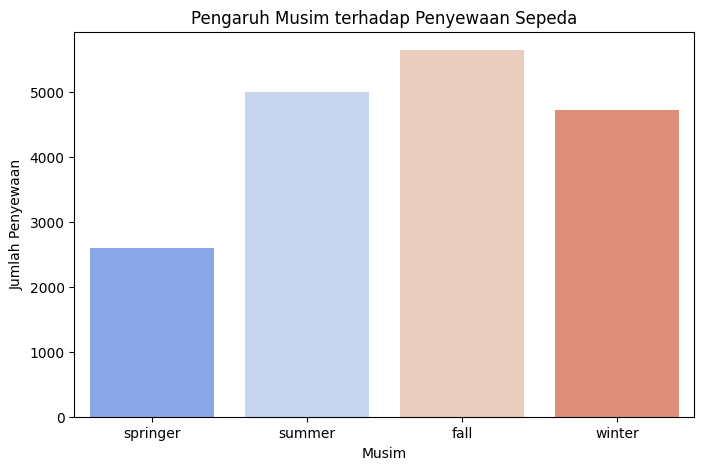

In [223]:
plt.figure(figsize=(8,5))
sns.barplot(x=day_df['season'], y=day_df['cnt'], data= day_df, palette='coolwarm', ci=None)
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.title("Pengaruh Musim terhadap Penyewaan Sepeda")
plt.show()

**Insight:**


---

1. Musim Gugur (Fall) memiliki penyewaan tertinggi

 * Fall memiliki jumlah penyewaan tertinggi, mungkin karena suhu yang nyaman dan cuaca yang stabil, sehingga lebih banyak orang menggunakan sepeda untuk transportasi atau rekreasi.

2. Musim Semi (Spring) memiliki penyewaan terendah
 * Spring memiliki penyewaan yang paling rendah. Ini bisa disebabkan oleh cuaca yang masih tidak stabil, seperti hujan atau suhu yang belum terlalu hangat.

3. Penyewaan tetap tinggi di Summer dan Winter
 * Summer memiliki penyewaan tinggi, mungkin karena lebih banyak orang yang beraktivitas di luar ruangan.
* Winter memiliki penyewaan yang masih cukup tinggi, menunjukkan bahwa ada pengguna yang tetap bersepeda meskipun cuaca dingin

## Analisis Lanjutan (Opsional)

### Analisis Clustering

Disini kita akan mengelompokan total pengguna berdasarkan kolom *weathersit*

In [224]:
day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

,cnt
weathersit,
Clear,451
Misty,243
Light_rainsnow,21


disini kita mengindentifikasi kelompok pengguna yang lebih cenderung menyewa sepeda pada hari-hari yang clear

## Conclusion

Berdasarkan analisis data penyewaan sepeda, terdapat beberapa temuan utama:
1. Tren Bulanan
 * Januari dan Februari memiliki jumlah penyewaan sepeda terendah (~130.000 - 150.000).
 * Tren mulai meningkat drastis dari Maret hingga Mei.
 * Puncak penyewaan terjadi pada Mei - September
 * Mei hingga September menunjukkan jumlah penyewaan tertinggi, berkisar antara 320.000 - 350.000.
2. Hari Kerja vs Hari Libur
 * Penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan hari libur. Hal ini menunjukkan bahwa banyak orang menggunakan sepeda sebagai alat transportasi untuk bekerja atau beraktivitas sehari-hari.
3. Pengaruh Musim terhadap Penyewaan Sepeda
 * Penyewaan sepeda tertinggi terjadi pada musim gugur (fall) dan musim panas (summer), kemungkinan karena cuaca yang lebih bersahabat.
 * Musim semi (spring) memiliki penyewaan terendah, mungkin karena kondisi cuaca yang masih tidak stabil.
 * Musim dingin (winter) tetap memiliki jumlah penyewaan yang cukup tinggi, yang menunjukkan bahwa sepeda masih digunakan sebagai transportasi meskipun kondisi cuaca lebih dingin.
4. Kesimpulan Utama:
 * Penyewaan sepeda dipengaruhi oleh faktor musim dan jenis hari. Penyewaan lebih banyak terjadi pada hari kerja dibandingkan hari libur, dan tren musiman menunjukkan bahwa penyewaan cenderung meningkat pada musim dengan cuaca yang lebih nyaman.